In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
epoch_time = pd.read_csv(
    '../training_logs/epoch_time.csv',
    names=['recorded_at', 'job_id', 'global_rank', 'local_rank', 'model_job_id', 'epoch', 'time']
)
epoch_time.head()

,recorded_at,job_id,global_rank,local_rank,model_job_id,epoch,time
0,2025-05-18 13:49:43,single-v5vktkkcbg046c,0,0,single-v5vktkkcbg046c,0,140.659864
1,2025-05-18 13:52:11,single-v5vktkkcbg046c,0,0,single-v5vktkkcbg046c,1,141.699433
2,2025-05-18 13:54:38,single-v5vktkkcbg046c,0,0,single-v5vktkkcbg046c,2,141.926468
3,2025-05-18 13:57:06,single-v5vktkkcbg046c,0,0,single-v5vktkkcbg046c,3,142.066725
4,2025-05-18 13:59:34,single-v5vktkkcbg046c,0,0,single-v5vktkkcbg046c,4,141.929731


In [3]:
jobs = [
    'single-v5vktkkcbg046c',
    'single-hmxvdzqqz1x9cd',
    'single-gg6r7plwk2b4vd',
    'ddp-mdgx1trqq0h4gd',
    'ddp-j0ldqsn0pdpwfc',
    'ddp-mxgcxhdj9zmkmd',
    'ddp-zjmd7l6nggc6rd',
    'ddp-nr0klkplw1m0f',
    'ddp-hp7bv729zlxnwc',
    'pp-kw02jgxb3h7mwd',
    'pp-c3xpvdw643bsnd',
    'pp-pzg56qpv9dsjwd',
    'pp-qpznchjf4m6pxc',
    'pp-pxlrnqx606chrd',
    'pp-ssbwpk61xtdchc',
    'pp-ghp6hmmmz9x2zc',
    'ddpnpp-dv2spt5t37x7ld',
    'ddpnpp-btq0f9zfqks6jc',
]
epoch_time.loc[epoch_time['job_id'].isin(jobs), ['job_id', 'time']].groupby('job_id').mean()

,time
job_id,
ddp-hp7bv729zlxnwc,90.648669
ddp-j0ldqsn0pdpwfc,61.143508
ddp-mdgx1trqq0h4gd,74.566353
ddp-mxgcxhdj9zmkmd,97.140290
ddp-nr0klkplw1m0f,95.943574
ddp-zjmd7l6nggc6rd,102.201446
ddpnpp-btq0f9zfqks6jc,135.909647
ddpnpp-dv2spt5t37x7ld,142.115394
pp-c3xpvdw643bsnd,196.381244


In [4]:
qwk_df = pd.read_csv(
    "../training_logs/qwk.csv",
    names=['recorded_at', 'job_id', 'global_rank', 'local_rank', 'model_job_id', 'epoch', 'qwk']
)
jobs = ['ddp-klhnmprdtmb2m', 'pp-zz92sg62q135lc', 'ddpnpp-nh60jbxqmd6bh', 'single-qljmg9z4h35c5c']
qwk_df = qwk_df[qwk_df['job_id'].isin(jobs)]
qwk_df['rn'] = qwk_df.sort_values('qwk', ascending=False).groupby('job_id').cumcount()
top_qwk = qwk_df[qwk_df['rn'] == 0]
top_qwk

,recorded_at,job_id,global_rank,local_rank,model_job_id,epoch,qwk,rn
124,2025-05-19 04:22:48,ddp-klhnmprdtmb2m,0,0,ddp-klhnmprdtmb2m,24,0.887480,0
245,2025-05-19 15:49:01,single-qljmg9z4h35c5c,0,0,single-qljmg9z4h35c5c,21,0.885723,0
546,2025-05-25 17:06:52,ddpnpp-nh60jbxqmd6bh,1,1,ddpnpp-nh60jbxqmd6bh,28,0.902432,0
608,2025-05-28 02:58:10,pp-zz92sg62q135lc,1,1,pp-zz92sg62q135lc,15,0.861382,0


In [5]:
weighted_f1_df = pd.read_csv(
    '../training_logs/weighted_f1.csv',
    names=['recorded_at', 'job_id', 'global_rank', 'local_rank', 'model_job_id', 'epoch', 'weighted_f1']
)
train_acc_df = pd.read_csv(
    '../training_logs/train_accuracy.csv',
    names=['recorded_at', 'job_id', 'global_rank', 'local_rank', 'model_job_id', 'epoch', 'train_acc']
)
training_acc_df = pd.read_csv(
    '../training_logs/training_accuracy.csv',
    names=['recorded_at', 'job_id', 'global_rank', 'local_rank', 'model_job_id', 'epoch', 'train_acc']
)
train_acc_df = pd.concat([train_acc_df, training_acc_df])
val_acc_df = pd.read_csv(
    '../training_logs/val_accuracy.csv',
    names=['recorded_at', 'job_id', 'global_rank', 'local_rank', 'model_job_id', 'epoch', 'val_acc']
)


In [6]:
merged = top_qwk.join(
    weighted_f1_df[['job_id', 'epoch', 'weighted_f1']].set_index(['job_id', 'epoch']),  
    on=['job_id', 'epoch'],
    rsuffix='_weighted_f1',
    how='left'
).join(
    train_acc_df[['job_id', 'epoch', 'train_acc']].set_index(['job_id', 'epoch']),
    on=['job_id', 'epoch'],
    rsuffix='_train_acc',
    how='left'
).join(
    val_acc_df[['job_id', 'epoch', 'val_acc']].set_index(['job_id', 'epoch']),
    on=['job_id', 'epoch'],
    rsuffix='_val_acc',
    how='left'
)
merged[['job_id', 'epoch', 'train_acc', 'val_acc', 'qwk', 'weighted_f1']].head()

,job_id,epoch,train_acc,val_acc,qwk,weighted_f1
124,ddp-klhnmprdtmb2m,24,0.975485,0.790984,0.887480,0.798094
245,single-qljmg9z4h35c5c,21,0.964127,0.796726,0.885723,0.798288
546,ddpnpp-nh60jbxqmd6bh,28,0.973056,0.809722,0.902432,0.816505
608,pp-zz92sg62q135lc,15,0.934028,0.745833,0.861382,0.760014


In [ ]:
jobs = ['ddp-klhnmprdtmb2m', 'pp-zz92sg62q135lc', 'ddpnpp-nh60jbxqmd6bh', 'single-qljmg9z4h35c5c']

def plot_metric(filename, metric, y_label, title):
    metric_df = pd.read_csv(
        filename,
        names=['recorded_at', 'job_id', 'global_rank',
               'local_rank', 'model_job_id', 'epoch', metric]
    )
    metric_df = metric_df[metric_df['job_id'].isin(jobs)]
    pivotted = (
        pd.pivot_table(metric_df, index='epoch',
                       columns='job_id', values=metric)
        .reset_index()
        .rename_axis(None, axis=1)
        .rename(columns={'epoch': 'Epoch'})
        .set_index('Epoch')
        .rename(columns={
            'ddp-klhnmprdtmb2m': 'DP',
            'pp-zz92sg62q135lc': 'PP',
            'ddpnpp-nh60jbxqmd6bh': 'DP+PP',
            'single-qljmg9z4h35c5c': 'Single'
        })
    )
    plt.plot(
        pivotted.index,
        pivotted['DP'],
        label='DP',
    )
    plt.plot(
        pivotted.index,
        pivotted['PP'],
        label='PP',
    )
    plt.plot(
        pivotted.index,
        pivotted['DP+PP'],
        label='DP+PP',
    )
    plt.plot(
        pivotted.index,
        pivotted['Single'],
        label='Single',
    )
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel(y_label)
    plt.title(title)

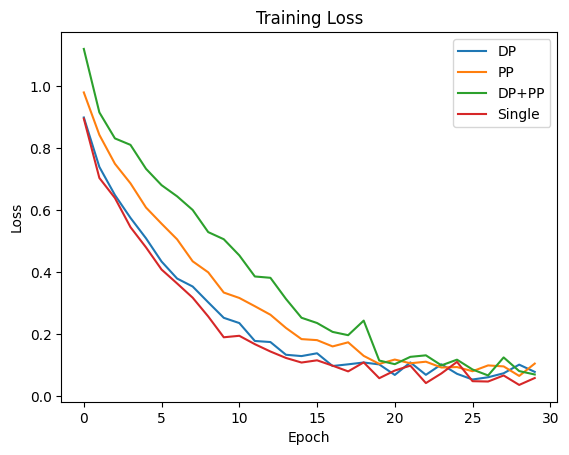

In [ ]:
plot_metric(
    '../training_logs/loss.csv',
    'loss',
    'Loss',
    'Training Loss'
)

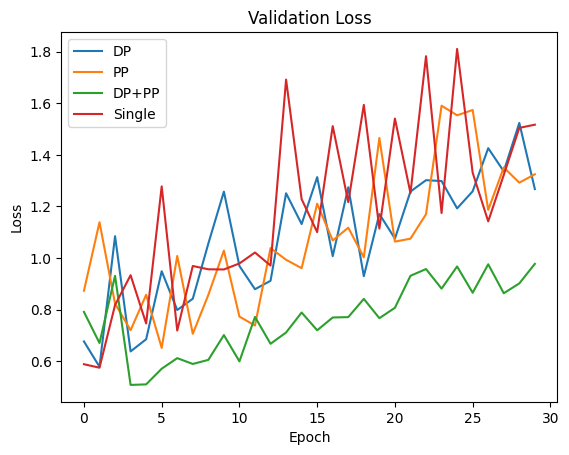

In [15]:
plot_metric(
    '../training_logs/val_loss.csv',
    'val_loss',
    'Loss',
    'Validation Loss'
)

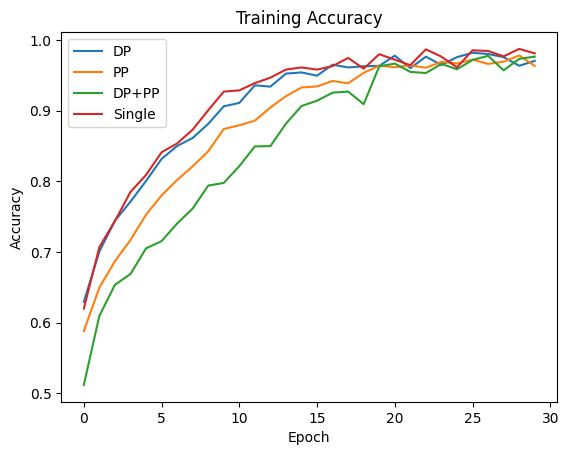

In [16]:
plot_metric(
    '../training_logs/merged_train_acc.csv',
    'train_acc',
    'Accuracy',
    'Training Accuracy'
)

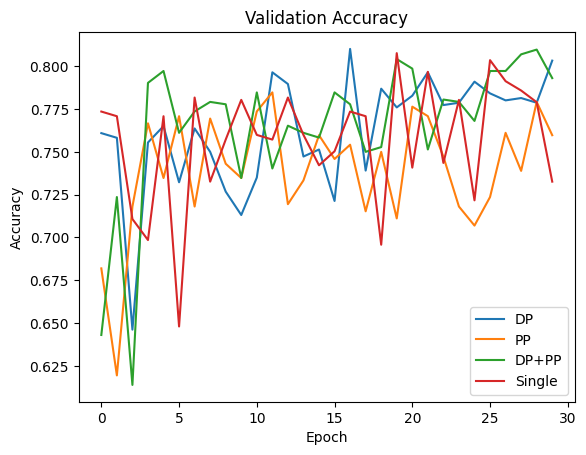

In [17]:
plot_metric(
    '../training_logs/val_accuracy.csv',
    'val_acc',
    'Accuracy',
    'Validation Accuracy'
)

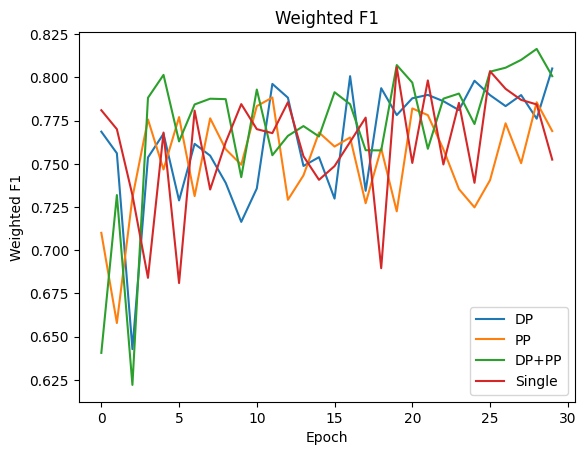

In [18]:
plot_metric(
    '../training_logs/weighted_f1.csv',
    'weighted_f1',
    'Weighted F1',
    'Weighted F1'
)

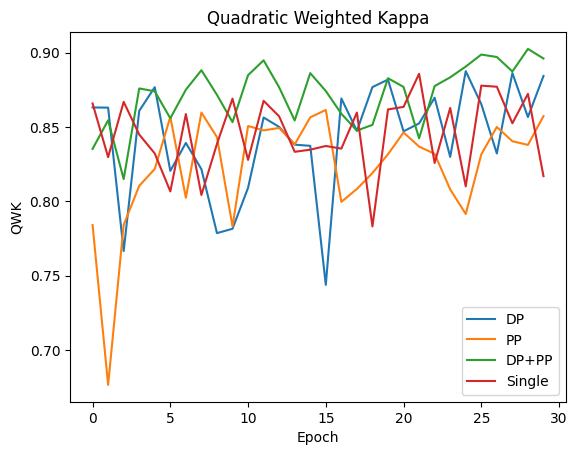

In [19]:
plot_metric(
    '../training_logs/qwk.csv',
    'qwk',
    'QWK',
    'Quadratic Weighted Kappa'
)

In [33]:
jobs = [
    'ddpnpp-dtwqrrhcwvc2jd',
    'ddpnpp-nh60jbxqmd6bh',
]

def plot_metric(filename, metric, y_label, title):
    metric_df = pd.read_csv(
        filename,
        names=['recorded_at', 'job_id', 'global_rank',
               'local_rank', 'model_job_id', 'epoch', metric]
    )
    metric_df = metric_df[metric_df['job_id'].isin(jobs)]
    pivotted = (
        pd.pivot_table(metric_df, index='epoch',
                       columns='job_id', values=metric)
        .reset_index()
        .rename_axis(None, axis=1)
        .rename(columns={'epoch': 'Epoch'})
        .set_index('Epoch')
        .rename(columns={
            'ddpnpp-nh60jbxqmd6bh': 'DP(3)+PP(2)',
            'ddpnpp-dtwqrrhcwvc2jd': 'DP(2)+PP(2)'
        })
    )
    plt.plot(
        pivotted.index,
        pivotted['DP(3)+PP(2)'],
        label='DP(3)+PP(2)',
    )
    plt.plot(
        pivotted.index,
        pivotted['DP(2)+PP(2)'],
        label='DP(2)+PP(2)',
    )
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel(y_label)
    plt.title(title)

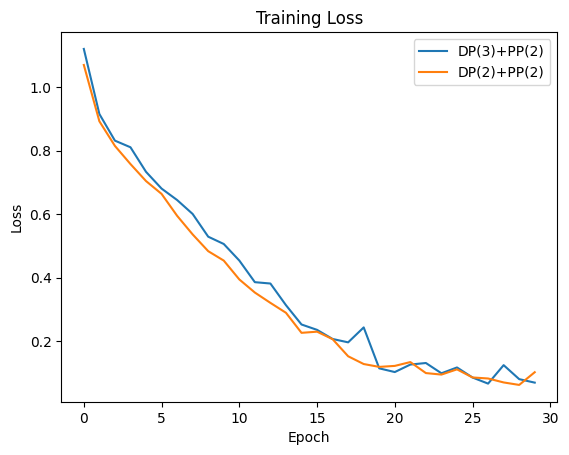

In [34]:
plot_metric(
    '../training_logs/loss.csv',
    'loss',
    'Loss',
    'Training Loss'
)

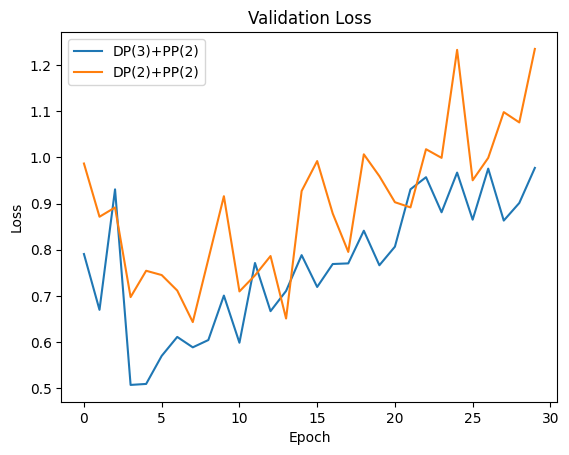

In [35]:
plot_metric(
    '../training_logs/val_loss.csv',
    'val_loss',
    'Loss',
    'Validation Loss'
)

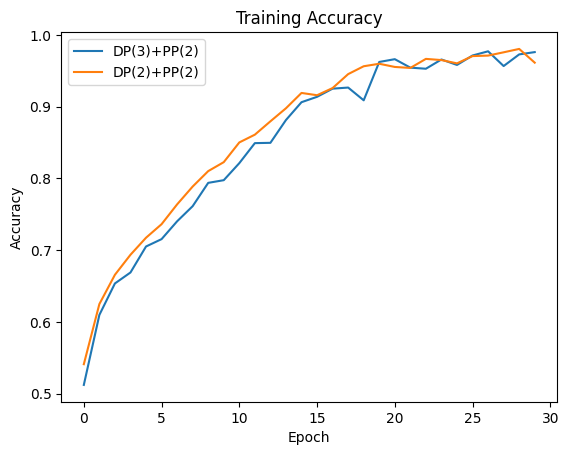

In [36]:
plot_metric(
    '../training_logs/merged_train_acc.csv',
    'train_acc',
    'Accuracy',
    'Training Accuracy'
)

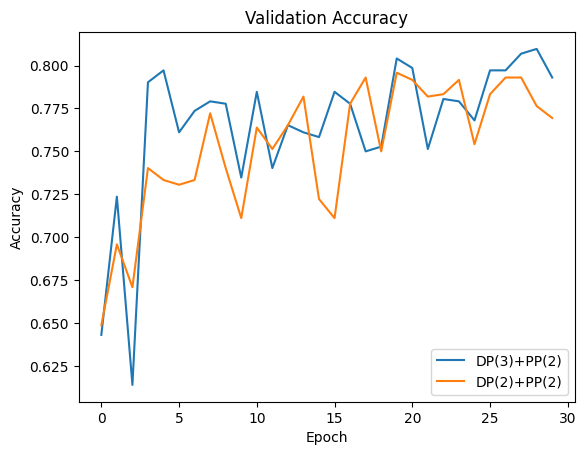

In [37]:
plot_metric(
    '../training_logs/val_accuracy.csv',
    'val_acc',
    'Accuracy',
    'Validation Accuracy'
)

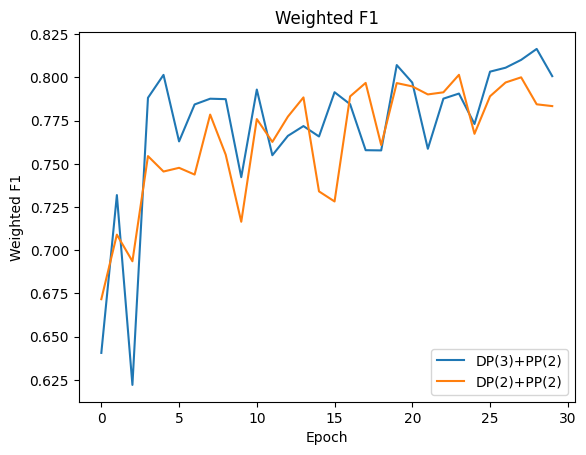

In [38]:
plot_metric(
    '../training_logs/weighted_f1.csv',
    'weighted_f1',
    'Weighted F1',
    'Weighted F1'
)

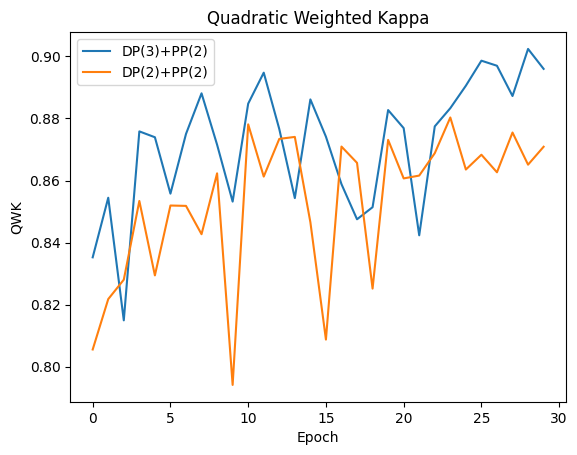

In [39]:
plot_metric(
    '../training_logs/qwk.csv',
    'qwk',
    'QWK',
    'Quadratic Weighted Kappa'
)